In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [7]:
df = pd.read_csv("cellula toxic data  (1).csv")
texts = df["query"]
labels = df["Toxic Category"]

In [8]:
le = LabelEncoder()
y = le.fit_transform(labels)
y = to_categorical(y)

In [9]:
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=max_len, padding="post", truncating="post")

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(9, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [12]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 249ms/step - accuracy: 0.2624 - loss: 2.0298 - val_accuracy: 0.3500 - val_loss: 1.8404
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 206ms/step - accuracy: 0.2932 - loss: 1.8669 - val_accuracy: 0.3500 - val_loss: 1.8299
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 211ms/step - accuracy: 0.3136 - loss: 1.8421 - val_accuracy: 0.3500 - val_loss: 1.8225
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 356ms/step - accuracy: 0.3170 - loss: 1.8603 - val_accuracy: 0.3500 - val_loss: 1.8250
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 229ms/step - accuracy: 0.3028 - loss: 1.8581 - val_accuracy: 0.3500 - val_loss: 1.8248


In [13]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=le.classes_))

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step
                           precision    recall  f1-score   support

Child Sexual Exploitation       0.00      0.00      0.00        24
                Elections       0.00      0.00      0.00        20
       Non-Violent Crimes       0.00      0.00      0.00        57
                     Safe       0.31      1.00      0.48       187
       Sex-Related Crimes       0.00      0.00      0.00        22
      Suicide & Self-Harm       0.00      0.00      0.00        20
           Unknown S-Type       0.00      0.00      0.00        36
           Violent Crimes       0.00      0.00      0.00       175
                   unsafe       0.00      0.00      0.00        59

                 accuracy                           0.31       600
                macro avg       0.03      0.11      0.05       600
             weighted avg       0.10      0.31      0.15       600



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


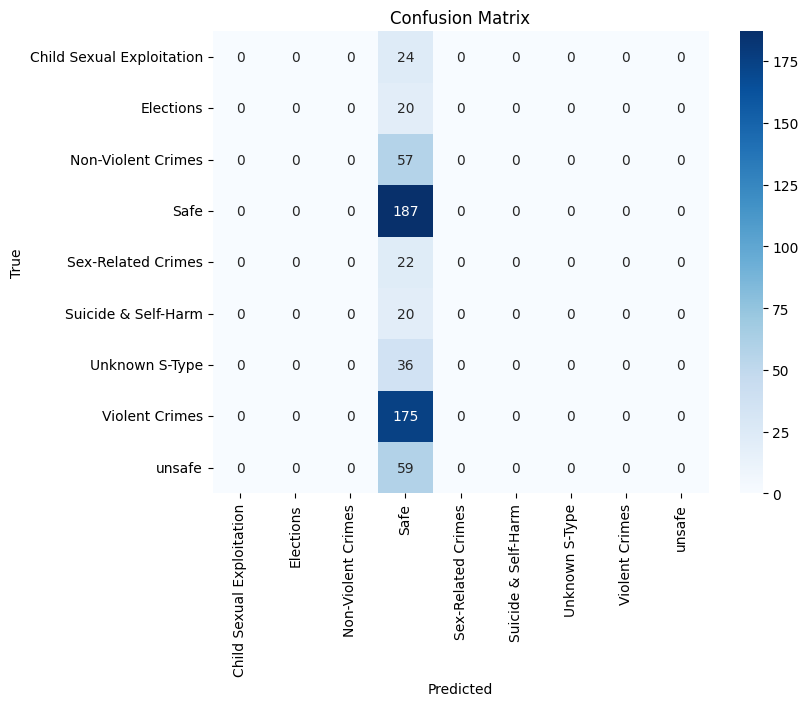

In [14]:
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

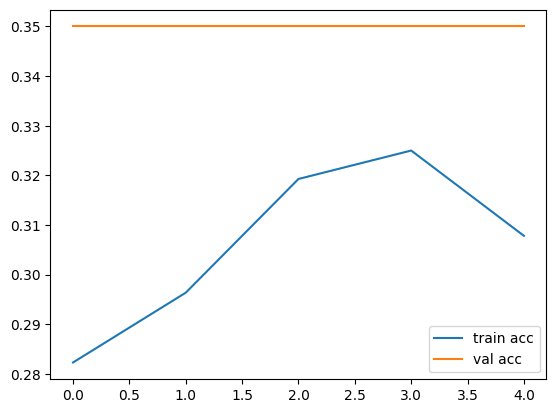

In [15]:
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.legend()
plt.show()